In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv('Emails.csv')
data.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data.shape


(5172, 3002)

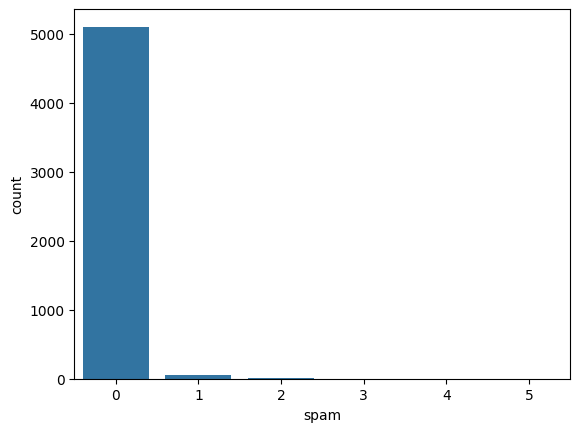

In [ ]:
sns.countplot(x='spam', data=data)
plt.show()


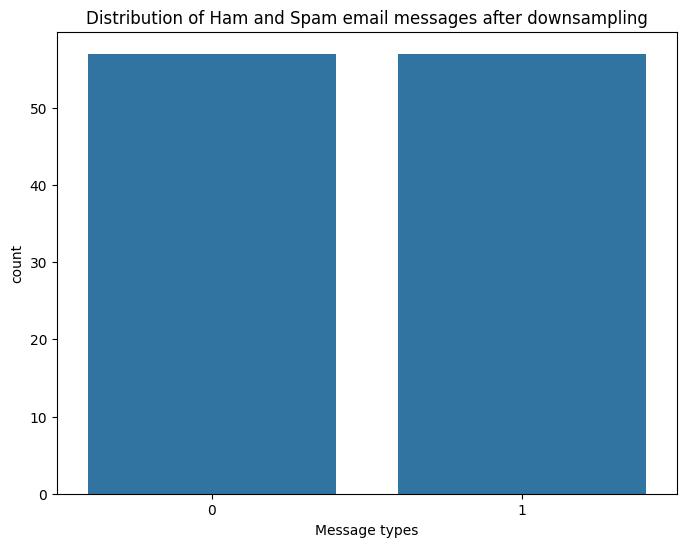

In [ ]:
ham_msg = data[data.spam == 0]
spam_msg = data[data.spam == 1]
ham_msg = ham_msg.sample(n=len(spam_msg), random_state=42)

balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)
plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_data, x='spam')
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types')
plt.show()



In [ ]:
balanced_data['text'] = balanced_data['text'].astype(str).str.replace('Subject', '', regex=False)

balanced_data.head()



,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 4495,0,0,1,1,2,2,7,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 591,14,3,11,6,8,1,56,3,4,...,0,0,0,0,0,0,0,1,0,0
2,Email 558,3,3,1,1,2,1,27,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 229,0,1,2,0,1,0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Email 1335,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
punctuations_list = string.punctuation
def remove_punctuations(text):
	temp = str.maketrans('', '', punctuations_list)
	return text.translate(temp)

balanced_data['text']= balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 4495,0,0,1,1,2,2,7,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 591,14,3,11,6,8,1,56,3,4,...,0,0,0,0,0,0,0,1,0,0
2,Email 558,3,3,1,1,2,1,27,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 229,0,1,2,0,1,0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Email 1335,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	for word in str(text).split():
		word = word.lower()

		if word not in stop_words:
			imp_words.append(word)

	output = " ".join(imp_words)

	return output


balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 4495,0,0,1,1,2,2,7,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 591,14,3,11,6,8,1,56,3,4,...,0,0,0,0,0,0,0,1,0,0
2,Email 558,3,3,1,1,2,1,27,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 229,0,1,2,0,1,0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Email 1335,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


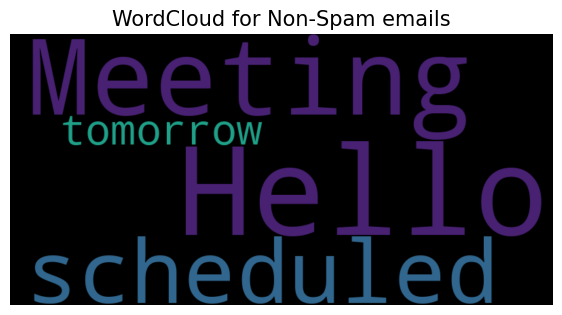

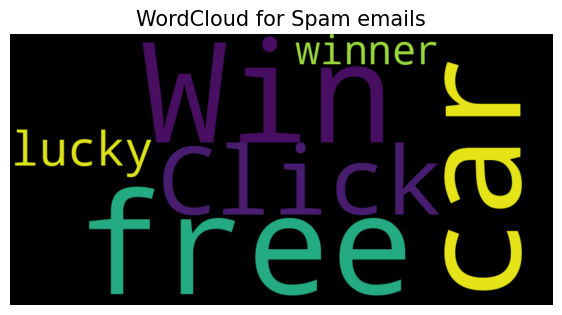

In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = {
    'spam': [0, 1, 0, 1],
    'text': [
        "Hello, how are you?",
        "Win a free car! Click here!",
        "Meeting scheduled for tomorrow.",
        "You are the lucky winner!"
    ]
}
balanced_data = pd.DataFrame(data)

def plot_word_cloud(data, typ):
    # Check if the dataset is empty
    if data.empty:
        print(f"No data available for {typ} emails.")
        return


    email_corpus = " ".join(data['text'].dropna().astype(str))


    if not email_corpus.strip():
        print(f"No text available to generate a word cloud for {typ} emails.")
        return


    plt.figure(figsize=(7, 7))
    wc = WordCloud(
        background_color='black',
        max_words=100,
        width=800,
        height=400,
        collocations=False
    ).generate(email_corpus)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()


plot_word_cloud(balanced_data[balanced_data['spam'] == 0], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['spam'] == 1], typ='Spam')


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split


data = {
    'spam': [0, 1, 0, 1],
    'text': [
        "Hello, how are you?",
        "Win a free car! Click here!",
        "Meeting scheduled for tomorrow.",
        "You are the lucky winner!"
    ]
}
balanced_data = pd.DataFrame(data)


train_X, test_X, train_Y, test_Y = train_test_split(
    balanced_data['text'],
    balanced_data['spam'],
    test_size=0.2,
    random_state=42
)


print("Training Data X:\n", train_X)
print("Training Data Y:\n", train_Y)
print("Testing Data X:\n", test_X)
print("Testing Data Y:\n", test_Y)


Training Data X:
 3          You are the lucky winner!
0                Hello, how are you?
2    Meeting scheduled for tomorrow.
Name: text, dtype: object
Training Data Y:
 3    1
0    0
2    0
Name: spam, dtype: int64
Testing Data X:
 1    Win a free car! Click here!
Name: text, dtype: object
Testing Data Y:
 1    1
Name: spam, dtype: int64


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

max_len = 100
train_sequences = pad_sequences(train_sequences,
                                 maxlen=max_len,
                                 padding='post',
                                 truncating='post')
test_sequences = pad_sequences(test_sequences,
                                maxlen=max_len,
                                padding='post',
                                truncating='post')


In [11]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
                                    output_dim=32,
                                    input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
			metrics = ['accuracy'],
			optimizer = 'adam')


In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,
                   monitor='val_accuracy',
                   restore_best_weights=True)

lr = ReduceLROnPlateau(patience=2,
                       monitor='val_loss',
                       factor=0.5,
                       verbose=1)


In [15]:
history = model.fit(train_sequences, train_Y,
					validation_data=(test_sequences, test_Y),
					epochs=20,
					batch_size=32,
					callbacks = [lr, es]
				)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:707: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 0.6947 - val_accuracy: 0.0000e+00 - val_loss: 0.6960 - learning_rate: 0.0010
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6667 - loss: 0.6922 - val_accuracy: 0.0000e+00 - val_loss: 0.6999 - learning_rate: 0.0010
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6667 - loss: 0.6909
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6667 - loss: 0.6909 - val_accuracy: 0.0000e+00 - val_loss: 0.7026 - learning_rate: 0.0010
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6667 - loss: 0.6901 - val_accuracy: 0.0000e+00 - val_loss: 0.7043 - learning_rate: 5.0000e-04


In [16]:
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 0.6960
Test Loss : 0.6960093975067139
Test Accuracy : 0.0


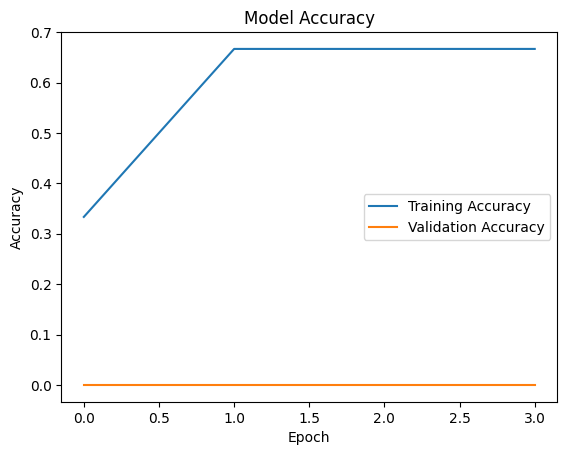

In [17]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
